*1. Import the necessary Python libraries, such as pandas, numpy, and sklearn.*


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Visualization imports
import matplotlib.pyplot as plt
%matplotlib inline


*2. Load the Titanic dataset into a pandas DataFrame using pandas.read_csv().*


In [5]:
data = pd.read_csv('titanic_train.csv')
data.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     464 non-null    object 
 14  survived      850 non-null    int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


*3. Preprocess the data by converting categorical features into numerical ones, filling in missing values, and scaling the numerical features using sklearn.preprocessing.*

In [7]:
data = data.drop(['name','ticket','cabin','boat','body','home.dest'], axis=1)              #removing these features since not important for target variable

In [8]:
data = data.fillna(df.mean())


/tmp/ipykernel_10954/513357919.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


In [9]:
data.head()

,passenger_id,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,1216,3,female,29.519847,0,0,7.7333,Q,1
1,699,3,male,38.000000,0,0,8.6625,S,0
2,1267,3,female,30.000000,1,1,24.1500,S,0
3,449,2,female,54.000000,1,3,23.0000,S,1
4,576,2,male,40.000000,0,0,13.0000,S,0


In [10]:
sex_map = {'male': 0, 'female': 1}
embarked_map = {'S': 0, 'C': 1, 'Q': 2}

data['sex'] = data['sex'].map(sex_map)
data['embarked'] = data['embarked'].map(embarked_map)

In [11]:
mode_embarked = data['embarked'].mode()[0] 
data['embarked'].fillna(mode_embarked, inplace=True)  


In [12]:
scaler = StandardScaler()

num_cols = ['age', 'sibsp', 'parch', 'fare']
data[num_cols] = scaler.fit_transform(df[num_cols])


*4. Split the dataset into training and test sets using
sklearn.model_selection.train_test_split().*

In [13]:
X = data.drop('survived', axis=1)
y = data['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


*5. Build an MLP classifier using sklearn.neural_network.MLPClassifier() and train it on the training data.*

In [14]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(8,6), max_iter=1000, random_state=1)
mlp.fit(X_train, y_train)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(8, 6), max_iter=1000,
              random_state=1, solver='lbfgs')

In [15]:
y_pred = mlp.predict(X_test)

*6. Evaluate the performance of the MLP classifier on the test data using metrics such as accuracy, precision, recall, and F1-score.*


In [16]:
print('Accuracy score:', accuracy_score(y_test, y_pred))
print('Precision score:', precision_score(y_test, y_pred))
print('Recall score:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

Accuracy score: 0.7470588235294118
Precision score: 0.7777777777777778
Recall score: 0.3620689655172414
F1 score: 0.4941176470588235


*7. Fine-tune the MLP classifier by adjusting its hyperparameters, such as the number of hidden layers, and the number of neurons per layer.*

*8.Evaluate the performance of the fine-tuned MLP classifier on the test data and compare it to the initial model.*


In [17]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(8,8), max_iter=1000, random_state=1)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print('Accuracy score:', accuracy_score(y_test, y_pred))
print('Precision score:', precision_score(y_test, y_pred))
print('Recall score:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

Accuracy score: 0.7705882352941177
Precision score: 0.7209302325581395
Recall score: 0.5344827586206896
F1 score: 0.6138613861386139


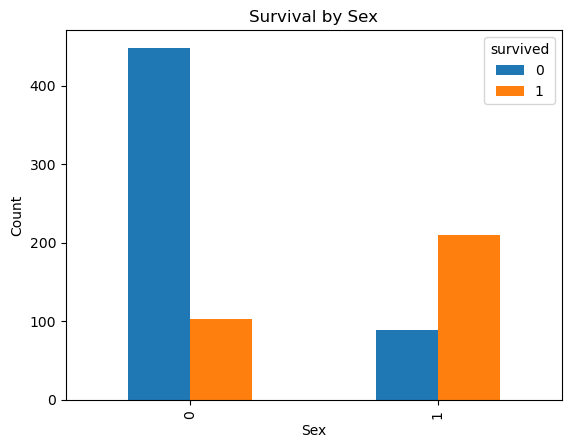

In [18]:
survival_by_sex = data.groupby(['sex', 'survived']).size().unstack()

survival_by_sex.plot(kind='bar', stacked=False)

plt.title('Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

plt.show()
